# Evaluierung

## Korrelation

Best correlation between the HR: 0 Minutes offset
Best correlation between RR: 0 Minutes offset
Best correlation between Sleep Stages: 3 Minutes offset


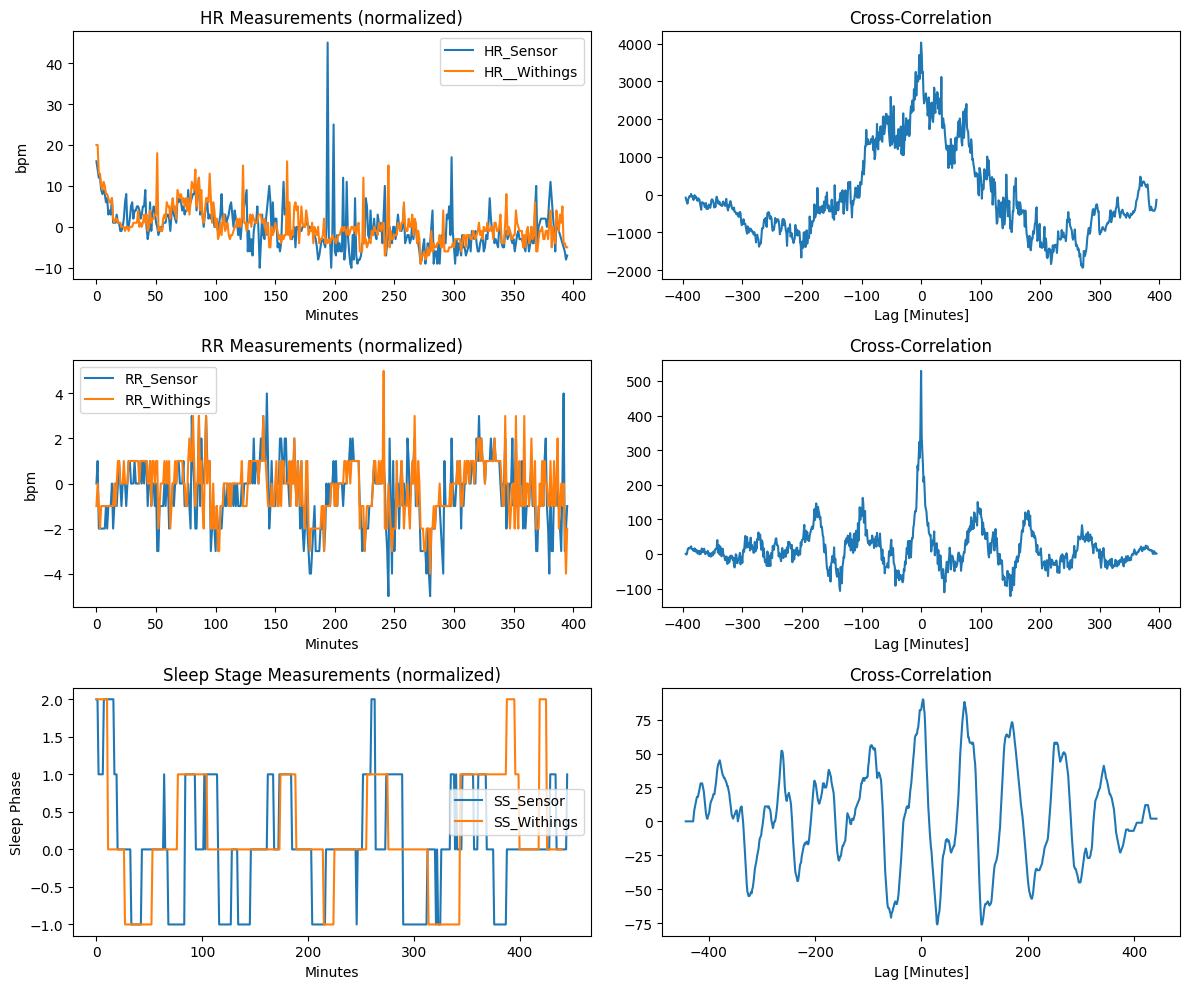

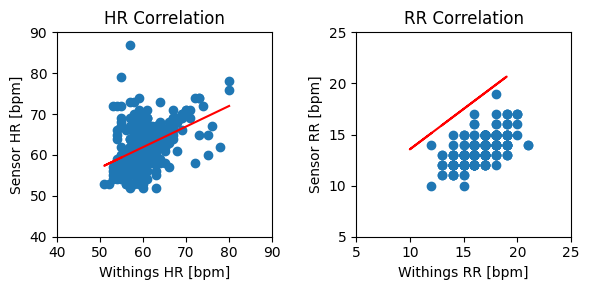

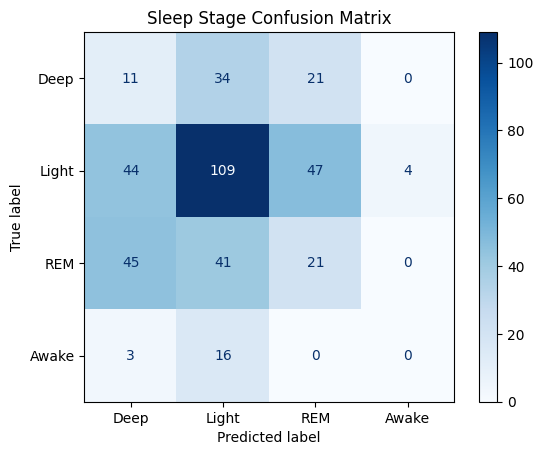

HR Accuracy: 0.11
HR Precision: 0.19
HR F1-Score: 0.11
RR Accuracy: 0.42
RR Precision: 0.34
RR F1-Score: 0.44
Sleep Phase Accuracy: 0.36
Sleep Phase Precision: 0.22
Sleep Phase F1-Score: 0.36


In [227]:
date = "29112021"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as skm

df_sensor = pd.read_csv("Sensordata/clean/" + date + "_sensor_data")
df_withings = pd.read_csv("Withings_Data/clean/" + date + "_withings_data")

clean_start = 25
offset = 72
hr_sensor = df_sensor["hr_sensor"].to_list()
hr_withings = df_withings["hr_withings"].to_list()
hr_s_norm = hr_sensor[clean_start:-clean_start] - np.median(hr_sensor[clean_start:-clean_start])
hr_w_norm = hr_withings[offset:len(hr_s_norm)+offset] - np.median(hr_withings[offset:len(hr_s_norm)+offset])
hr_s_clipped = hr_sensor[clean_start:-clean_start]
hr_w_clipped = hr_withings[offset:len(hr_s_clipped)+offset]
cross_corr = signal.correlate(hr_s_norm, hr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
plt.style.use('default')
plt.figure(figsize=(12, 10))
plt.subplot(321, title="HR Measurements (normalized)", xlabel="Minutes", ylabel="bpm")
plt.plot(hr_s_norm, label="HR_Sensor")
plt.plot(hr_w_norm, label="HR__Withings")
plt.legend()
plt.subplot(322, title="Cross-Correlation", xlabel="Lag [Minutes]")
plt.plot(x_vals, cross_corr)
plt.tight_layout()
plt.show
print("Best correlation between the HR:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2), "Minutes offset")

rr_sensor = df_sensor["rr_sensor"].to_list()
rr_withings = df_withings["rr_withings"].to_list()
rr_s_norm = rr_sensor[clean_start:-clean_start] - np.median(rr_sensor[clean_start:-clean_start])
rr_w_norm = rr_withings[offset:len(rr_s_norm)+offset] - np.median(rr_withings[offset:len(rr_s_norm)+offset])
rr_s_clipped = rr_sensor[clean_start:-clean_start]
rr_w_clipped = rr_withings[offset:len(rr_s_clipped)+offset]
cross_corr = signal.correlate(rr_s_norm, rr_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
# plt.style.use('default')
# plt.figure(figsize=(12, 3))
plt.subplot(323, title="RR Measurements (normalized)", xlabel="Minutes", ylabel="bpm")
plt.plot(rr_s_norm, label="RR_Sensor")
plt.plot(rr_w_norm, label="RR_Withings")
plt.legend()
plt.subplot(324, title="Cross-Correlation", xlabel="Lag [Minutes]")
plt.plot(x_vals, cross_corr)
plt.tight_layout()
plt.show
print("Best correlation between RR:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2), "Minutes offset")

# Sleep stage offset
offset = offset + 0

ss_sensor = df_sensor["ss_sensor"].to_list()
ss_withings = df_withings["ss_withings"].to_list()
ss_s_norm = ss_sensor - np.median(ss_sensor)
ss_w_norm = ss_withings[offset:len(ss_s_norm)+offset] - np.median(ss_withings[offset:len(ss_s_norm)+offset])
ss_s_clipped = ss_sensor[clean_start:-clean_start]
ss_w_clipped = ss_withings[offset:len(ss_s_clipped)+offset]
cross_corr = signal.correlate(ss_s_norm, ss_w_norm, "full", method="fft").tolist()
x_vals = range(int(-len(cross_corr)/2), int(-len(cross_corr)/2)+int(len(cross_corr)))
# plt.style.use('default')
# plt.figure(figsize=(12, 3))
plt.subplot(325, title="Sleep Stage Measurements (normalized)", xlabel="Minutes", ylabel="Sleep Phase")
plt.plot(ss_s_norm, label="SS_Sensor")
plt.plot(ss_w_norm, label="SS_Withings")
plt.legend()
plt.subplot(326, title="Cross-Correlation", xlabel="Lag [Minutes]")
plt.plot(x_vals, cross_corr)
plt.show
plt.tight_layout()
print("Best correlation between Sleep Stages:", cross_corr.index(max(cross_corr))-int(len(cross_corr)/2),"Minutes offset")

plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.scatter(hr_w_clipped, hr_s_clipped)
plt.xlim([40, 90])
plt.ylim([40, 90])
z = np.polyfit(hr_w_clipped, hr_s_clipped, 1)
p = np.poly1d(z)
plt.plot(hr_w_clipped,p(hr_w_clipped),"r")
plt.xlabel("Withings HR [bpm]")
plt.ylabel("Sensor HR [bpm]")
plt.title("HR Correlation")
plt.subplot(122)
plt.scatter(rr_s_clipped, rr_w_clipped)
plt.ylim([5, 25])
plt.xlim([5, 25])
z = np.polyfit(rr_w_clipped, rr_s_clipped, 1)
p = np.poly1d(z)
plt.plot(rr_w_clipped,p(rr_w_clipped),"r")
plt.xlabel("Withings RR [bpm]")
plt.ylabel("Sensor RR [bpm]")
plt.title("RR Correlation")
plt.tight_layout()
ConfusionMatrixDisplay.from_predictions(ss_w_clipped, ss_s_clipped, display_labels=["Deep","Light","REM","Awake"], cmap="Blues").ax_.set_title("Sleep Stage Confusion Matrix")
plt.show()

print(f"HR Accuracy: {skm.accuracy_score(hr_w_norm, hr_s_norm):.2f}")
print(f"HR Precision: {skm.precision_score(hr_w_norm, hr_s_norm, average='macro', zero_division=1):.2f}")
print(f"HR F1-Score: {skm.f1_score(hr_w_norm, hr_s_norm, average='weighted'):.2f}")
#ConfusionMatrixDisplay.from_predictions(hr_w_clipped, hr_s_clipped, cmap="Blues")
print(f"RR Accuracy: {skm.accuracy_score(rr_w_norm, rr_s_norm):.2f}")
print(f"RR Precision: {skm.precision_score(rr_w_norm, rr_s_norm, average='macro', zero_division=1):.2f}")
print(f"RR F1-Score: {skm.f1_score(rr_w_norm, rr_s_norm, average='weighted'):.2f}")
#ConfusionMatrixDisplay.from_predictions(rr_w_clipped, rr_s_clipped, cmap="Blues")
print(f"Sleep Phase Accuracy: {skm.accuracy_score(ss_w_clipped, ss_s_clipped):.2f}")
print(f"Sleep Phase Precision: {skm.precision_score(ss_w_clipped, ss_s_clipped, average='macro', zero_division=1):.2f}")
print(f"Sleep Phase F1-Score: {skm.f1_score(ss_w_clipped, ss_s_clipped, average='weighted'):.2f}")